# BLOB REJECTION STUDIES

In [2]:
import csth.utils.photopeak_fit as pk

import numpy                as np
import pandas               as pd
import matplotlib.pyplot    as plt
import matplotlib.patches  as patches
import matplotlib.gridspec as gridspec

from scipy                   import optimize
from scipy.integrate         import quad

In [10]:
# Plotting style
figure_size  = 15, 5
font_size    = 14

plt.rcParams["figure.figsize"]  = figure_size
plt.rcParams[  "font.size"   ]  = font_size
plt.rcParams["axes.facecolor"]  = 'ghostwhite'
#plt.rcParams["axes.grid"     ]  = True
#plt.rcParams["grid.color"    ]  = 'lightgrey'
plt.rcParams["axes.formatter.limits"] = -4, 4
plt.rcParams["font.family"]='serif'

#plt.style.use(plt.style.available[10])

#set number of bins
nbins = 100

In [11]:
def plottext(res, cov, n):
    mus, smus = int(round(res.x[0])), int(round(cov[0][0]**.5))
    mub, smub = int(round(res.x[1])), int(round(cov[1][1]**.5))
    s, ss     = res.x[2], cov[2][2]**.5
    mu, smu   = int(round(res.x[3])), int(round(cov[3][3]**.5))
    sig, ssig = int(round(res.x[4])), int(round(cov[4][4]**.5))

    tres = (fr'$\mu_s    = {mus}\pm{smus}$' + '\n' +
            fr'$\mu_b    = {mub}\pm{smub}$' + '\n' +
            fr'$E_{{ph}} = {mu} \pm {smu}$' + '\n' +
            fr'$\sigma   = {sig} \pm {ssig}$' + '\n'+
            fr'Total Entries: {n}')
    return tres


def fitplot(E, res, cov, nbins):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    h,_,_ = ax.hist(E, bins=int(nbins), alpha=0.5, histtype='step', color='darkblue', linewidth=2);
    e = np.linspace(a, b, 1000)
    ax.plot(e, ((b-a)/nbins*len(E))*pk.pkpdf(e, res.x, [a,b]), c='black')

    ax.text(a, h.max()/2., s=plottext(res, cov, len(E)))

    ax.set_xlabel('Energy (pes)');
    ax.set_ylabel('Entries');

In [23]:
def W(E, x, lims):
    
    a, b = lims
    c, r = (a+b)/2., 1/(b-a)

    def fb(x):
        s = x[2]
        return s*(E-c) + r
    
    def fs(x):
        mu, sig = x[3], x[4]
        #A, _ = quad(gauss, a, b, args=(mu, sig))
        A = sig*(2*np.pi)**(1/2.)
        return (1/A)*gauss(E, mu, sig)
    
    def gauss(E, mu, sig):
        return np.e**(-(E-mu)**2/(2*sig**2))
    
    return fs(x)/(fs(x)+fb(x))

# DATA IMPORTATION

In [24]:
run = 6484
datadir = '/home/gonzalo/Documentos/NEXT/ICAROSNB/GDL/DATA'
data = pd.HDFStore(f'{datadir}/cepks_{run}_0000_11999_6q0min.h5')['/esum']

a, b = 410000, 445000
thds = data[(a<data['e'])&(data['e']<b)]

Radius = range(10, 20)
for R in Radius:
    ex = f'bl_{R} = pd.HDFStore(f"./blobdata/blobs3_{run}_{a}_{b}_radious{R}.h5")["/blobs"]'
    exec(ex)

## Th double scape fitting

In [28]:
E = thds['e'].values

#fit 
x0 = np.array([.5*len(E), .5*len(E), 0, np.mean(E), np.std(E)])
res, cov = pk.pkfit(E, [a,b], x0=x0)

Optimization terminated successfully.
         Current function value: 55470.237623
         Iterations: 16
         Function evaluations: 1832


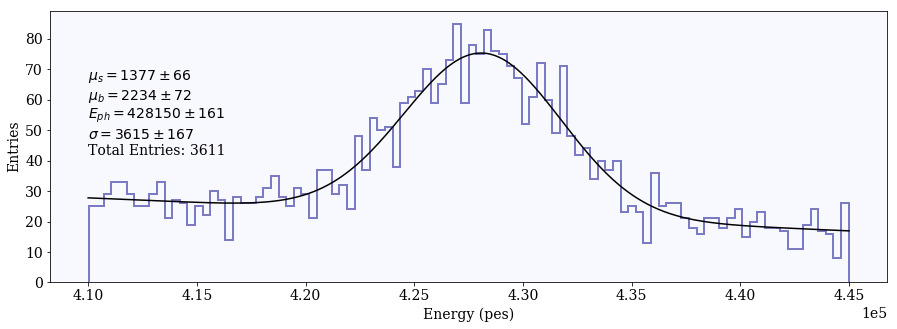

In [29]:
fitplot(E, res, cov, nbins)

In [31]:
w = W(E, res.x, [a, b])

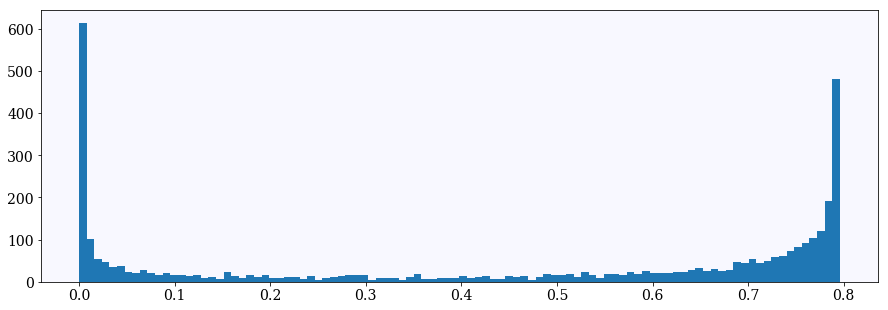

In [34]:
plt.hist(w, bins=nbins);

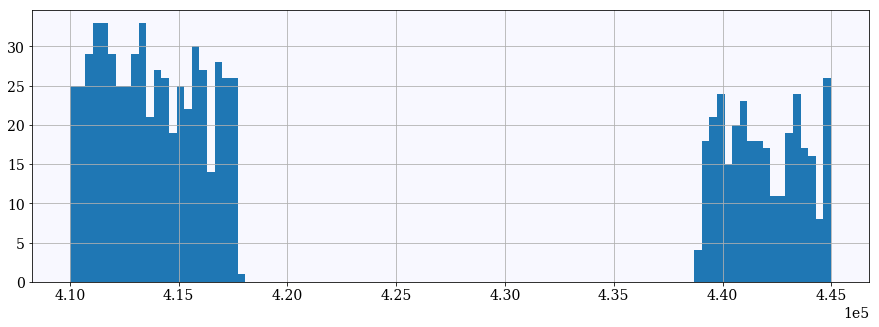

In [41]:
thds[w<0.05]['e'].hist(bins=nbins)